# Housing Price Prediction

We aim to predict the housing prices in the King County region of USA

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
%matplotlib inline

In [5]:
df=pd.read_csv(r"C:\Users\nikhi\PythonMasterClass\Data Analytics Bootcamp\kc_house_data_NaN.csv",index_col=0)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.shape

(21613, 21)

Checking the number of records

In [10]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Interospecting into the data type of the columns

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Here we see the 5 number summay besides other statistical info for numerical columns

# Data Wrangling

We look to prepare our data for further processing by dropping unnecessary features and imputing missing values

In [12]:
df.drop(columns=['id'],axis=1,inplace=True)

In [14]:
df.drop(columns=['date'],axis=1,inplace=True)

We drop id and date columns as we believe it to have no effect on our predictions

In [16]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
df.isnull().any()

price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

From the above result, we see only bedrooms and bathrooms seem to have null values. We evaluate the percentage of null values in these features to determine the best imputation technique.

In [22]:
missing_bedrooms=(df['bedrooms'].isnull().sum()/df.shape[0])
missing_bedrooms_percentage=missing_bedrooms*100

missing_bathrooms=(df['bathrooms'].isnull().sum()/df.shape[0])
missing_bathrooms_percentage=missing_bathrooms*100

print("Percenatge of missing values for bedrooms is: {}".format(missing_bedrooms_percentage))
print("Percentage of missing values for bathrooms is: {}".format(missing_bathrooms_percentage))

Percenatge of missing values for bedrooms is: 0.0601489844075325
Percentage of missing values for bathrooms is: 0.046268449544255776


As we have minuscule number of values missing in either feature, we could either delete the rows or use a measure of central tendancy (mean/median)

In [26]:
##Performing mean imputation
mean_bedrooms=df['bedrooms'].mean()
df['bedrooms'].fillna(mean_bedrooms,inplace=True)
mean_bathrooms=df['bathrooms'].mean()
df['bathrooms'].fillna(mean_bathrooms,inplace=True)

# Exploratory Data Analysis

Now we delve deep into some of the features which could have a bearing on the price of the house

In [27]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

We see the distribution of the number of bedrooms among houses

<AxesSubplot:xlabel='waterfront', ylabel='price'>

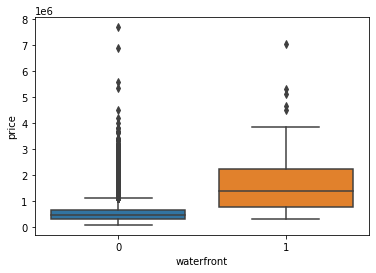

In [29]:
sns.boxplot(x='waterfront',y='price',data=df)

Through the above observation, it seems that the waterfront feature could be a reasonable predictor for price as there is a fairly significant difference in the price distribution between the houses that have a waterfront versus those who don't.

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

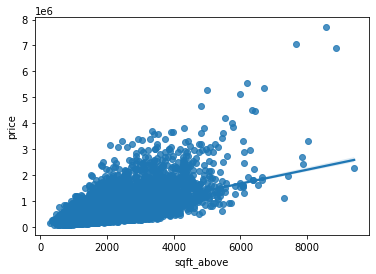

In [31]:
sns.regplot(x='sqft_above',y='price',data=df)

Through the above plot we observe a positive correlation between 'sqft_above' and 'price'

We can obtain the pearson correlation between 'price' and every other feature. This gives us a fair idea as to which feature is more important than the other

In [34]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

Through the calculations above, we see features such as 'yr_renovates', 'sqft_lot', 'sqft_lot15', 'yr_built', 'condition', 'long', 'zipcode' not having a significant impact. We could, therefore, go ahead and ignore these features when we look to build a model in the next stage

# Model Building 

Multivariate Linear Regression: Multiple predictors are used to predict the output. The goal is to find the optimal parameters of the line equation.

In [35]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]  

In [42]:
X=df[features]
Y=df[['price']]
lm=LinearRegression()
lm.fit(X,Y)
yhat=lm.predict(X)
print("Predicted House Prices are:\n")
print(yhat[0:5])
print("***")
print("Actual House Prices are:\n")
print(Y[0:5])
print("The R^2 of the model is: {}".format(lm.score(X,Y)))

Predicted House Prices are:

[[283576.14176653]
 [661944.14176653]
 [312248.14176653]
 [411064.14176653]
 [532920.14176653]]
***
Actual House Prices are:

      price
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0
The R^2 of the model is: 0.6576435664044019


Through our simple linear regression model we have received an R^2 value of 0.65 which is reasonable. Let's now see how we could improve the model's performance

Polynomial Regression: We look to fit a polynomial of the nth order which could fit our data better.

In [43]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [44]:
pipe=Pipeline(Input)
pipe.fit(X,Y)
print("The R^2 for the model is: {}".format(pipe.score(X,Y)))

The R^2 for the model is: 0.7504006868647579


We build a simple pipeline, wherein we perform standardization of the features, convert the features to a polynomial, and finally use the least squares approach to find the optimal parameters.

# Model Evaluation and Refinement

The testing so far has been done on the training set, which is usually not a good indicator of model performance on unseen data. Therefore, we divide our dataset into training and test sets (80-20 rule) to isolate the training and testing process.

In [50]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [52]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)

0.6478759163939111

We apply ridge regression to ensure we don't overfit our model. Ridge coeffiecnt looks to reduce the effect of the parameters

In [54]:
poly=PolynomialFeatures()
pr_train_x=poly.fit_transform(x_train)
pr_test_x=poly.fit_transform(x_test)
RidgeModel.fit(pr_train_x,y_train)
RidgeModel.score(pr_test_x,y_test)

0.7002744284423543

Using Ridge Regression, we compare the R^2 obtained on the test sets of both multivariate linear regrssion and polynomial regression. We see that the polynomial regression has a small advantage over multivariate linear regression 